# **The Dataset**      
https://www.kaggle.com/datasets/missionjee/car-sales-report

# **The Goal**   
The goal of this project is to leverage Market and Seasonal Analysis to derive useful information from sales data.   
This information will be obtained by identifying key cyclical trends and market drivers, in order to optimize the Supply Chains and Inventory management.   
This in turn will ensure that dealer stock levels align with anticipated customer demand, minimizing costly overstocking while preventing lost sales due to stockouts, ultimately maximizing profitability and operational efficiency.

# **Importing, Data Overview and Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

car_sales = pd.read_csv(r"C:\Users\ZEMI\Documents\Data\Datasets\car_sales.csv")

In [3]:
# Brief overview of the dataframe contents
car_sales.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
# Overview of the dataset (rows and columns), looking for nulls and datatypes
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
# Brief statistical description of the numerical columns
car_sales.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [15]:
# Looking for unique values to understand the dataset better
car_sales.nunique()
# Only 3 colors in 23906 transactions gives it away this has to be a synthethic dataset

Company         10
Price ($)    19668
dtype: int64

In [7]:
# Changing format from "object" to "datetime64[ns]"
car_sales["Date"] = pd.to_datetime(car_sales["Date"])

In [8]:
# Inspecting Null values based on car_sales.info()
car_sales[car_sales["Customer Name"].isnull()]
# One row without "Customer Name" but the rest seems valid so let's keep it this way

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,2022-11-05,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


In [9]:
# Cleaning the "Engine" column (DoubleÂ Overhead Camshaft)
car_sales["Engine"].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [10]:
# Cleaning the "Engine" column (DoubleÂ Overhead Camshaft)
car_sales["Engine"] = car_sales["Engine"].str.replace(u'\u00a0', ' ', regex=False)

car_sales["Engine"] = car_sales["Engine"].str.replace('Â', '', regex=False)

car_sales["Engine"] = car_sales["Engine"].str.strip()

In [16]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    23906 non-null  object
 1   Price ($)  23906 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 280.3+ KB


# New Measures

In [12]:
# Binning by Income and creating a new column named "Income Group" 
car_sales["Income Group"] = pd.cut(
    x = car_sales["Annual Income"],
    bins =[0,
    car_sales["Annual Income"].quantile(0.25),
    car_sales["Annual Income"].quantile(0.5),
    car_sales["Annual Income"].quantile(0.75),
    car_sales["Annual Income"].max()],
    labels = ["Low Income", "Middle Income", "High Income", "Very High Income"],
    include_lowest=True)

In [13]:
# Assessing if the bins are equally distributed
car_sales['Income Group'].value_counts()

Income Group
Middle Income       5981
Low Income          5979
Very High Income    5977
High Income         5969
Name: count, dtype: int64

In [14]:
# Adding seasonal columns to look for deeper insights
car_sales["Year"] = car_sales["Date"].dt.year
car_sales['Month_Name'] = car_sales['Date'].dt.month_name()
car_sales['Day_of_Week'] = car_sales['Date'].dt.day_name()

In [15]:
# Creating a rolling sum of "Price ($)" to see sales evolution over time
car_sales = car_sales.sort_values(by='Date').reset_index(drop=True)
car_sales['Cumulative Price'] = (
    car_sales.groupby('Year')['Price ($)']
    .cumsum()
)

In [16]:
# Saving the cleaned DataFrame
car_sales.to_csv(r"C:\Users\ZEMI\Documents\Data\Datasets\car_sales_cleaned.csv", index = False)

In [17]:
# Only using the cleaned DataFrame from now on and adding 2 more columns "Price_Bins" and "Year_Month"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

car_sales = pd.read_csv(r"C:\Users\ZEMI\Documents\Data\Datasets\car_sales_cleaned.csv")
car_sales['Date'] = pd.to_datetime(car_sales['Date']) # Converting "Date" to datetime again

# Calculating a new column "Price_Bins"

price_data = car_sales['Price ($)']
Q1 = price_data.quantile(0.25)
Q2 = price_data.quantile(0.50)
Q3 = price_data.quantile(0.75)
MAX = price_data.max()

epsilon = 1e-6 
bins = [0, Q1, Q2, Q3, MAX + epsilon] 
labels = ['Economy', 'Mid Range', 'Premium', 'Luxury']

car_sales['Price_Bins'] = pd.cut(
    price_data,
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Create the new 'Year_Month' column
car_sales['Year_Month'] = car_sales['Date'].dt.strftime('%Y-%m')

car_sales.head()

,Unnamed: 0,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,...,Body Style,Phone,Dealer_Region,Income Group,Year,Month_Name,Day_of_Week,Cumulative Price,Price_Bins,Year_Month
0,0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,...,SUV,8264678,Middletown,Low Income,2022,January,Sunday,26000,Premium,2022-01
1,1,C_CND_000021,2022-01-02,Adrianna,Male,13500,Clay Johnson Auto Sales,Toyota,4Runner,Overhead Camshaft,...,Sedan,7889827,Austin,Low Income,2022,January,Sunday,51000,Premium,2022-01
2,2,C_CND_000022,2022-01-02,Joshua,Male,2500000,Classic Chevy,Infiniti,I30,Double Overhead Camshaft,...,Hardtop,6183219,Austin,Very High Income,2022,January,Sunday,72000,Mid Range,2022-01
3,3,C_CND_000024,2022-01-02,Arthur,Male,920000,Star Enterprises Inc,Porsche,Carrera Cabrio,Double Overhead Camshaft,...,Passenger,7959858,Pasco,High Income,2022,January,Sunday,90000,Economy,2022-01
4,4,C_CND_000025,2022-01-02,Lizzie,Male,672000,Suburban Ford,Volkswagen,Jetta,Double Overhead Camshaft,...,Passenger,8570849,Janesville,Middle Income,2022,January,Sunday,112000,Mid Range,2022-01


In [22]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Car_id            23906 non-null  object        
 1   Date              23906 non-null  datetime64[ns]
 2   Customer Name     23905 non-null  object        
 3   Gender            23906 non-null  object        
 4   Annual Income     23906 non-null  int64         
 5   Dealer_Name       23906 non-null  object        
 6   Company           23906 non-null  object        
 7   Model             23906 non-null  object        
 8   Engine            23906 non-null  object        
 9   Transmission      23906 non-null  object        
 10  Color             23906 non-null  object        
 11  Price ($)         23906 non-null  int64         
 12  Dealer_No         23906 non-null  object        
 13  Body Style        23906 non-null  object        
 14  Phone             2390

# **Data Analysis**

## Goal: Market, Seasonal Analysis and Supply Chain/Inventory optimization  
    
What are the **relevant factors affecting sales**, what are the trends telling us and how can we **optimize sales/supply chains and inventories**, based on **consumer preferences and market trends**?  

-    **Overall Market**  
     What is the Total Sales and Units Sold for each company? What is the Market Share?

-    **Seasonal:**    
     How are Sales Trends evolving and are there any seasonal patterns to get insights from?  
     How is the car sales activity during the different days of the week?
-    **Regional:**      
     Which Regions are selling the most and how are the trends evolving?  
-    **Engine**  
     Which Engine Type sells more and should we be shifting production to satisfy consumer preferences?    
-    **Transmission**    
     Which Transmission Type sells more and should we be shifting production to satisfy consumer preferences?  
-    **Body Style**  
     What do Body Style trends tell us? Should we be shifting production to satisfy consumer preferences? Does Gender play a role on it?   
-    **Gender**  
     What are car sales trends per gender telling us? Should we prepare our models to cater to a specific gender preference?  
-    **Color**  
     What are car sales color trends telling us? Should we increase the supply of certain colors?
-    **Price Category**  
     How are different car price levels sales evolving? Should we adapt our pricing strategy?
-    **Income Group**  
     How is each Income Group trend sales evolving? What are their preferences for Body Style, so we can adapt our supply according to the groups we want to target?

# Company Analysis

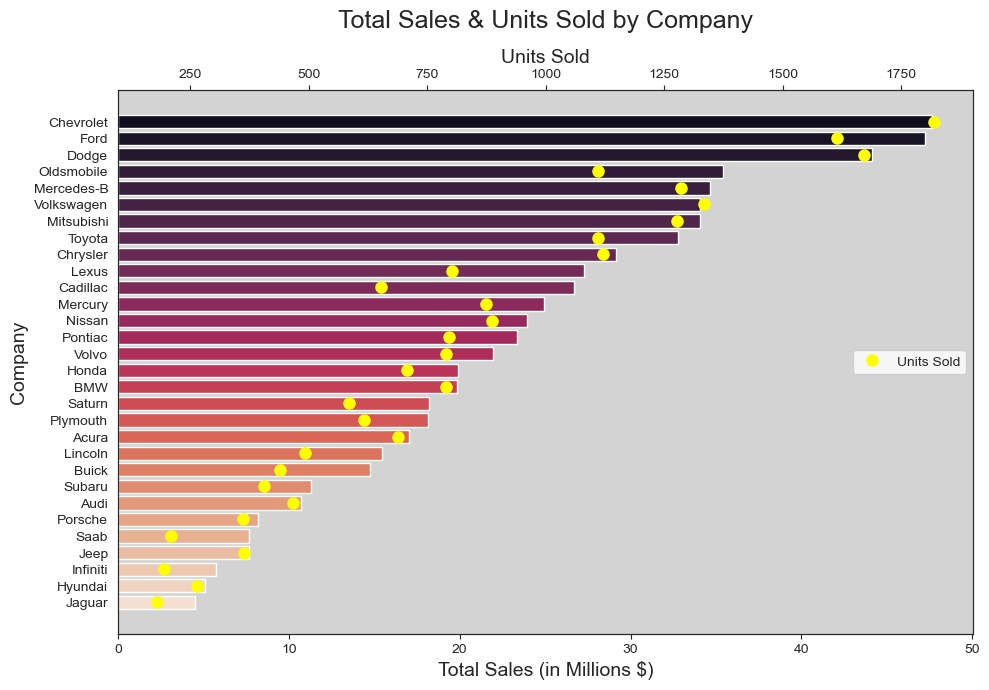

In [18]:
# --- Question: What is the Total Sales and Units Sold per company? ---

# Group by the column: 'Company'
brand_sales = car_sales.groupby('Company').agg(
    {'Price ($)': ['sum', 'count']}
).reset_index()

# Flatten the column index and rename
brand_sales.columns = ['Brand', 'Total Sales ($)', 'Units Sold']

# Convert Total Sales to Millions and sort by Total Sales (M)
ONE_MILLION = 1000000
brand_sales['Total Sales (M)'] = brand_sales['Total Sales ($)'] / ONE_MILLION
brand_sales = brand_sales.sort_values(by='Total Sales (M)', ascending=False)


# Dual Axis Plotting (Bar + Markers)
fig, ax1 = plt.subplots(figsize=(10, 7))
sns.set_style("white")

# AXIS 1 (Bar Chart - Bottom X-axis: Total Sales)
sns.barplot(
    x='Total Sales (M)',
    y='Brand',
    data=brand_sales,
    palette = "rocket",
    ax=ax1,
    legend=False,
    hue = "Brand"
)

# Styling for AXIS 1
ax1.set_facecolor('lightgray')
ax1.grid(False)
ax1.set_title('Total Sales & Units Sold by Company', fontsize=18, y=1.1)
ax1.set_xlabel('Total Sales (in Millions $)', fontsize=14)
ax1.tick_params(axis='x')
ax1.set_ylabel('Company', fontsize=14)


# AXIS 2 (Marker Plot - Top X-axis: Units Sold)
ax2 = ax1.twiny()

# Use plt.plot to draw only markers (ls='')
ax2.plot(
    brand_sales['Units Sold'],
    brand_sales['Brand'],
    color="Yellow",
    marker='o', 
    ls='',      
    markersize=8,
    label='Units Sold'
)

# Styling for AXIS 2
ax2.set_xlabel('Units Sold', fontsize=14)
ax2.tick_params(axis='x')
ax2.grid(False)
ax2.legend(loc='center right')

plt.tight_layout()
plt.show()

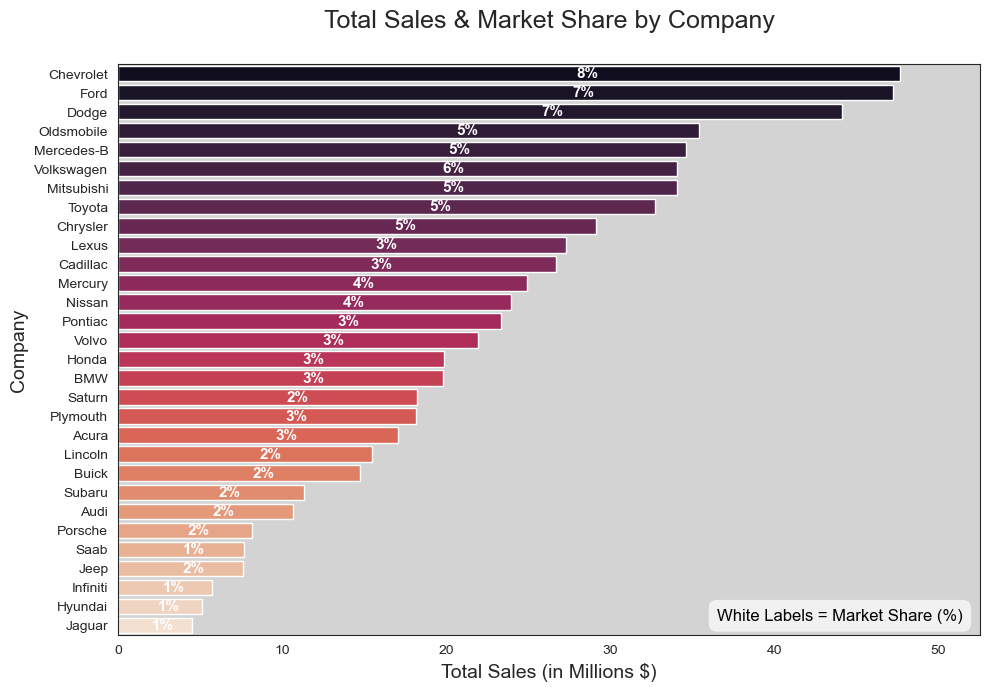

In [32]:
# --- Question: What is the Market Share by company? ---

# Group by the column: 'Company'
brand_sales = car_sales.groupby('Company').agg(
    {'Price ($)': ['sum', 'count']}
).reset_index()

# Flatten the column index and rename
brand_sales.columns = ['Brand', 'Total Sales ($)', 'Units Sold']

# Calculate Total Sales (M) and Market Share (%)
ONE_MILLION = 1000000
brand_sales['Total Sales (M)'] = brand_sales['Total Sales ($)'] / ONE_MILLION
total_units_sold = brand_sales['Units Sold'].sum()
brand_sales['Market Share (%)'] = (brand_sales['Units Sold'] / total_units_sold) * 100
brand_sales = brand_sales.sort_values(by='Total Sales (M)', ascending=False)


# Single Axis Plotting (Bar Chart with Labels) 
fig, ax1 = plt.subplots(figsize=(10, 7))
sns.set_style("white")

# AXIS 1 (Bar Chart - Total Sales) 
ax1 = sns.barplot(
    x='Total Sales (M)',
    y='Brand',
    data=brand_sales,
    palette="rocket",
    ax=ax1,
    hue = "Brand",
    errorbar=None 
)

# Styling for AXIS 1
ax1.set_facecolor('lightgray')
ax1.grid(False)
ax1.set_title('Total Sales & Market Share by Company', fontsize=18, y=1.05)
ax1.set_xlabel('Total Sales (in Millions $)', fontsize=14)
ax1.tick_params(axis='x')
ax1.set_ylabel('Company', fontsize=14)

# Market Share labels inside the bars
for p in ax1.patches:
    y_index = int(p.get_y() + p.get_height() / 2)
    share = brand_sales.iloc[y_index]['Market Share (%)']
    x_pos = p.get_width() * 0.6 
    y_pos = p.get_y() + p.get_height() / 2
    percentage_label = f'{int(round(share))}%'
    
    ax1.text(
        x_pos, 
        y_pos, 
        percentage_label,
        color='white',   
        ha='center',     
        va='center',     
        fontsize=11,
        fontweight='bold'
    )
ax1.set_xlim(ax1.get_xlim()[0], ax1.get_xlim()[1] * 1.05) 


# Add Custom Legend/Annotation for Market Share 
ax1.text(
    0.98, # X-coordinate: 98% across the plot (far right)
    0.02, # Y-coordinate: 2% up from the bottom (lower right)
    'White Labels = Market Share (%)',
    transform=ax1.transAxes, # Ensures coordinates are relative to the plot area
    color='black',
    fontsize=12,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()

# Seasonal analysis

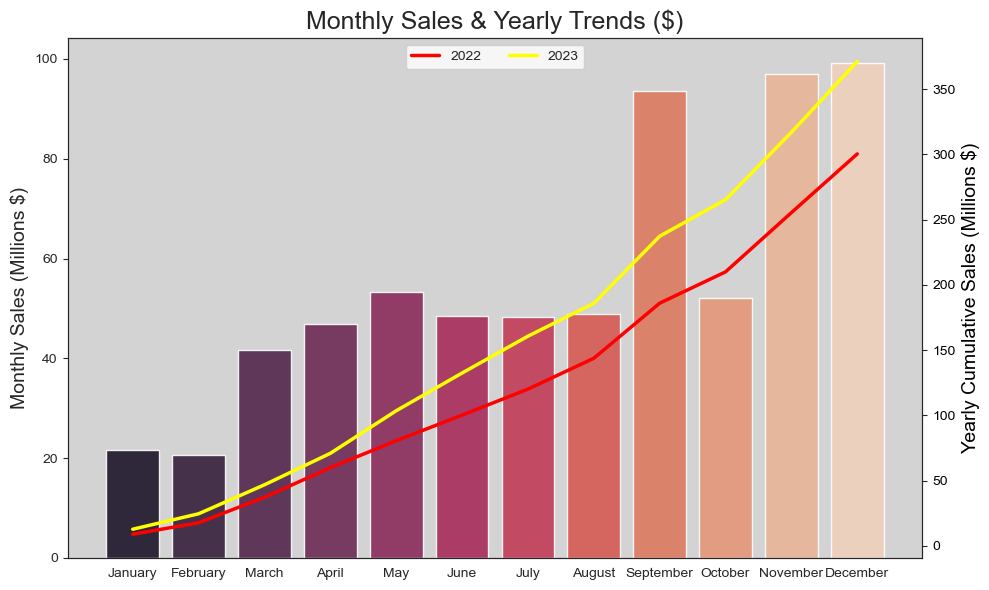

In [20]:
# --- Question: What are car sales trends telling us? Are there any seasonal effects to get insights from? ---

ONE_MILLION = 1000000
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
car_sales['Month_Name'] = pd.Categorical(car_sales['Month_Name'], categories=month_order, ordered=True)

# Monthly Total Sales (BAR CHART Data)
monthly_sales = car_sales.groupby('Month_Name', observed=False)['Price ($)'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales ($)']
monthly_sales['Total Sales (M)'] = monthly_sales['Total Sales ($)'] / ONE_MILLION

# Monthly Cumulative Sales (LINE CHART Data)
car_sales['Cumulative Price (M)'] = car_sales['Cumulative Price'] / ONE_MILLION
monthly_cumulative_sales = car_sales.groupby(['Year', 'Month_Name'],observed=False)['Cumulative Price (M)'].max().reset_index()
monthly_cumulative_sales = monthly_cumulative_sales.sort_values('Month_Name')


# Dual Axis Plotting
fig, ax1 = plt.subplots(figsize=(10, 6)) 
sns.set_style("white")

# AXIS 1 (Bar Chart - Left Y-axis)
sns.barplot(
    x='Month',
    y='Total Sales (M)',
    data=monthly_sales,
    hue='Month',         
    legend=False,
    palette='rocket',   
    ax=ax1,
    alpha = 0.9
)

# Styling for AXIS 1
ax1.set_facecolor('lightgrey')
ax1.grid(False)
ax1.set_title('Monthly Sales & Yearly Trends ($)', fontsize=18)
ax1.set_ylabel('Monthly Sales (Millions $)', fontsize=14) 
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=0)

# AXIS 2 (Line Plot - Right Y-axis) 
ax2 = ax1.twinx()

sns.lineplot(
    x='Month_Name', 
    y='Cumulative Price (M)', 
    hue='Year', 
    data=monthly_cumulative_sales, 
    palette={2022: 'r', 2023: 'yellow'},
    linewidth=2.5,
    ax=ax2,
  )

# Styling for AXIS 2
ax2.set_ylabel('Yearly Cumulative Sales (Millions $)', color='k', fontsize=14) 
ax2.tick_params(axis='y', labelcolor='k')
ax2.grid(False)
ax2.set_xlabel('')

plt.legend(loc="upper center", ncol=2)
plt.tight_layout()
plt.show()

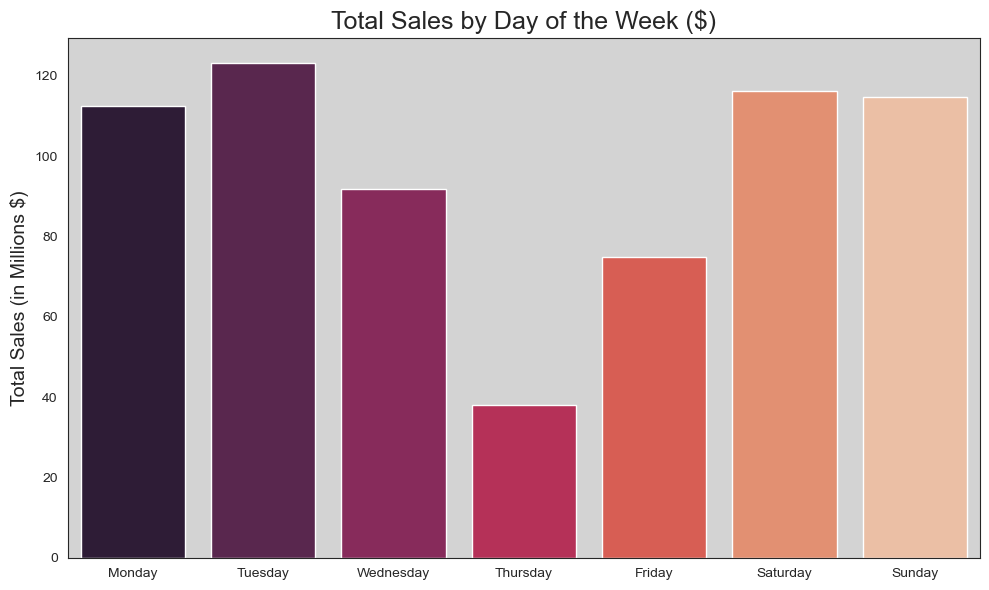

In [21]:
# --- Question: What days of the week have the most sales activity? ---

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
car_sales['Day_of_Week'] = pd.Categorical(car_sales['Day_of_Week'], categories=day_order, ordered=True)
sales_by_weekday = car_sales.groupby('Day_of_Week', observed=False)['Price ($)'].sum().reset_index()
sales_by_weekday.columns = ['Day of Week', 'Total Sales ($)']

ONE_MILLION = 1000000
sales_by_weekday['Total Sales (M)'] = sales_by_weekday['Total Sales ($)'] / ONE_MILLION

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Day of Week',
    y='Total Sales (M)',
    data=sales_by_weekday,
    hue="Day of Week",
    legend=False,
    palette='rocket'
)

plt.gca().set_facecolor('lightgrey')
sns.set_style("white")
plt.grid(False)
plt.title('Total Sales by Day of the Week ($)', fontsize = 18)
plt.ylabel('Total Sales (in Millions $)', fontsize = 14) 
plt.xlabel('')
plt.tight_layout()
plt.show()

# Regional Analysis

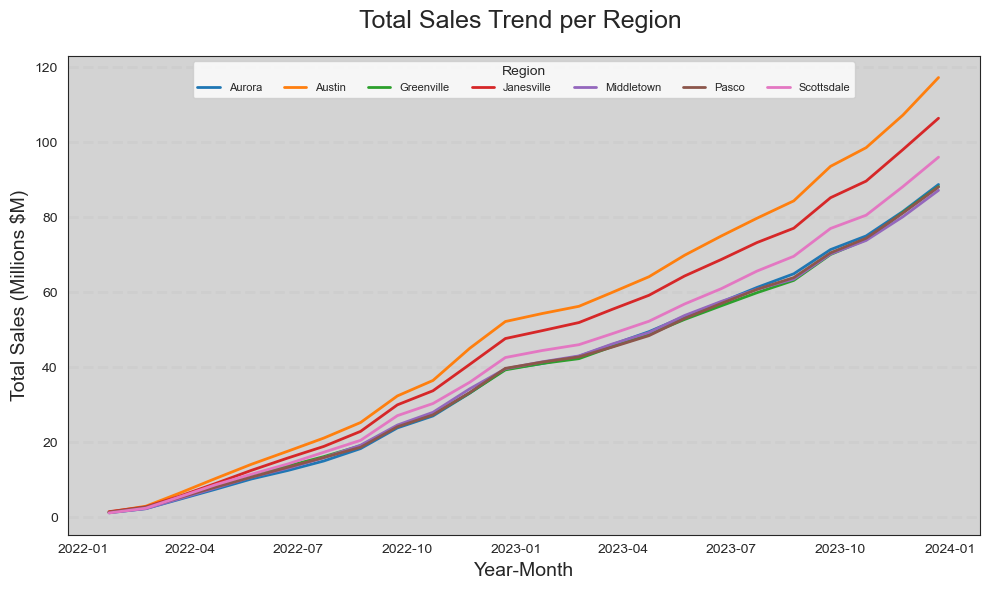

In [100]:
# --- Question: How are the Regional sales trends evolving? ---

# Ensuring 'Price ($)' is numeric and 'Date' is datetime, then sort
car_sales['Price ($)'] = pd.to_numeric(car_sales['Price ($)'], errors='coerce')
car_sales['Date'] = pd.to_datetime(car_sales['Date'])
car_sales = car_sales.sort_values(by='Date')

# Preparing Date Columns
car_sales['Sale_Month'] = car_sales['Date'].dt.strftime('%Y-%m')
car_sales['Sale_Date'] = pd.to_datetime(car_sales['Sale_Month'])

# Aggregating Group by Sale_Month, Dealer_Region and sum sales
monthly_sales_region = car_sales.dropna(subset=['Price ($)', 'Dealer_Region']).groupby(
    ['Sale_Month', 'Dealer_Region']
)['Price ($)'].sum().reset_index()
monthly_sales_region.rename(columns={'Price ($)': 'Monthly_Sales'}, inplace=True)

# Calculating CUMULATIVE SALES within each region
monthly_sales_region['Cumulative_Sales'] = monthly_sales_region.groupby('Dealer_Region')[
    'Monthly_Sales'
].cumsum()

# Scaling Data: Converting Cumulative Sales to Millions
monthly_sales_region['Cumulative_Sales_Millions'] = monthly_sales_region['Cumulative_Sales'] / 1_000_000

# Merging the Sale_Date Timestamp back for plotting and sorting
date_map = car_sales[['Sale_Month', 'Sale_Date']].drop_duplicates()
monthly_sales_region = monthly_sales_region.merge(date_map, on='Sale_Month', how='left').sort_values(by='Sale_Date')

# Visualization: Line Plot (Cumulative Sales by Region)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=monthly_sales_region,
    x='Sale_Date',
    y='Cumulative_Sales_Millions',
    hue='Dealer_Region',
    linewidth=2
)

# Setting custom locators and formatters for a clean datetime axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Total Sales Trend per Region ', fontsize=18, pad=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales (Millions \$M)', fontsize=14)
plt.legend(title='Region', loc='upper center', fontsize=8, ncol = 7)
plt.grid(axis = "y", linestyle='--', alpha=0.7, linewidth = 2)
plt.gca().set_facecolor('lightgrey')
plt.gcf().autofmt_xdate(rotation=0, ha='right')
plt.tight_layout()

plt.show()

NameError: name 'MultipleLocator' is not defined

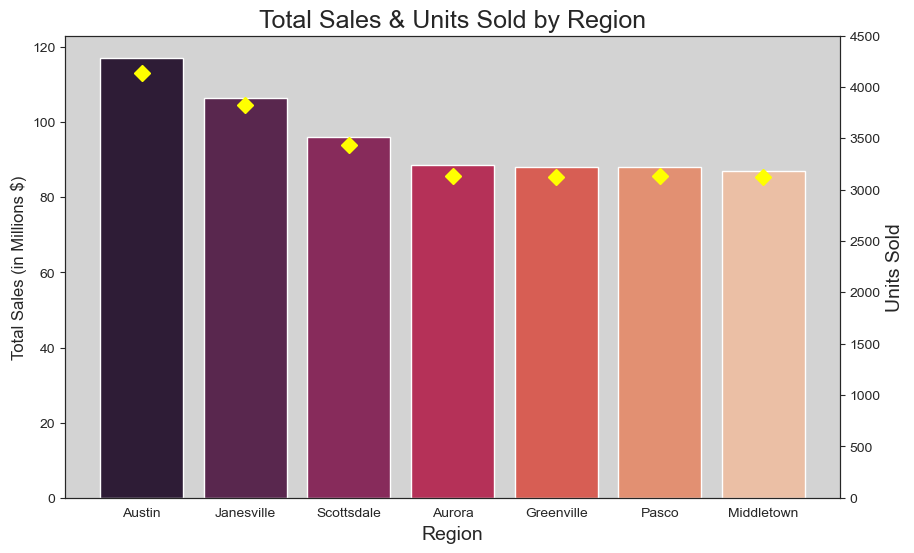

In [33]:
# --- Question: What are the Total Sales and Units Sold per Region? Which Regions are performing better and worse?

# Grouping by Dealer_Region and aggregating Sum of Sales and Count of Units
region_sales = car_sales.groupby('Dealer_Region').agg(
    {'Price ($)': ['sum', 'count']}
).reset_index()

region_sales.columns = ['Region', 'Total Sales ($)', 'Units Sold']

# Converting Total Sales to Millions and sorting
ONE_MILLION = 1000000
region_sales['Total Sales (M)'] = region_sales['Total Sales ($)'] / ONE_MILLION
region_sales = region_sales.sort_values(by='Total Sales (M)', ascending=False)


# Dual Axis Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.set_style("white")

# AXIS 1 (Bar Chart - Left Y-axis: Total Sales)
sns.barplot(
    x='Region',
    y='Total Sales (M)',
    data=region_sales,
    palette = "rocket",
    ax=ax1,
    legend=False,
    hue = "Region"
)

# Styling for AXIS 1
ax1.set_facecolor('lightgray')
ax1.grid(False)
ax1.set_title('Total Sales & Units Sold by Region', fontsize=18)
ax1.set_ylabel('Total Sales (in Millions $)', fontsize=12)
ax1.tick_params(axis='y')
ax1.set_xlabel('Region', fontsize=14)
ax1.tick_params(axis='x', rotation=0)

# AXIS 2 (Marker Plot - Right Y-axis: Units Sold)
ax2 = ax1.twinx() 

# Plotting Units Sold using markers only
ax2.plot(
    region_sales['Region'],
    region_sales['Units Sold'],
    color="Yellow",
    marker='D', 
    ls='',      
    markersize=8,
    label='Units Sold (Count)'
)

# Styling for AXIS 2
ax2.set_ylabel('Units Sold', fontsize=14)
ax2.tick_params(axis='y')
ax2.grid(False) 
ax2.set_ylim(0,4500)
ax2.yaxis.set_major_locator(MultipleLocator(1000))

ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Engine Analysis 

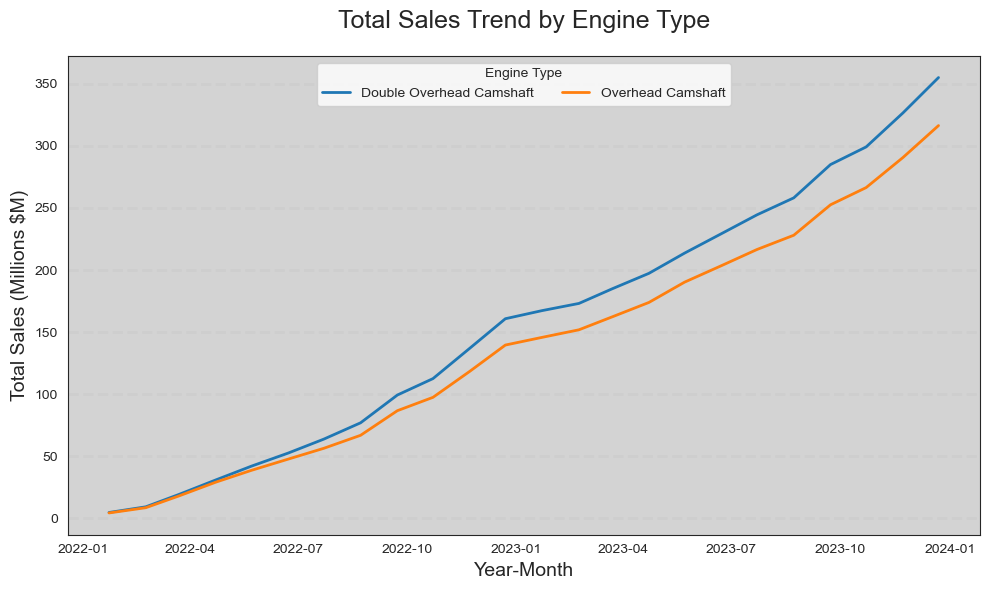

In [108]:
# --- Question: What are the sales trends for each type of Engine telling us? Which type sells the most? ---

# Ensuring 'Price ($)' is numeric and 'Date' is datetime, then sorting
car_sales['Price ($)'] = pd.to_numeric(car_sales['Price ($)'], errors='coerce')
car_sales['Date'] = pd.to_datetime(car_sales['Date'])
car_sales = car_sales.sort_values(by='Date')

# Preparing Date Columns
car_sales['Sale_Month'] = car_sales['Date'].dt.strftime('%Y-%m')
car_sales['Sale_Date'] = pd.to_datetime(car_sales['Sale_Month'])

# Aggregating Group by Sale_Month and Engine and sum sales
# Dropping missing values for price and engine type
monthly_sales_engine = car_sales.dropna(subset=['Price ($)', 'Engine']).groupby(
    ['Sale_Month', 'Engine']
)['Price ($)'].sum().reset_index()
monthly_sales_engine.rename(columns={'Price ($)': 'Monthly_Sales'}, inplace=True)

# Calculating CUMULATIVE SALES within each engine group
monthly_sales_engine['Cumulative_Sales'] = monthly_sales_engine.groupby('Engine')[
    'Monthly_Sales'
].cumsum()

# Scaling Data: Converting Cumulative Sales to Millions
monthly_sales_engine['Cumulative_Sales_Millions'] = monthly_sales_engine['Cumulative_Sales'] / 1_000_000

# Merging the Sale_Date Timestamp back for plotting and sort
date_map = car_sales[['Sale_Month', 'Sale_Date']].drop_duplicates()
monthly_sales_engine = monthly_sales_engine.merge(date_map, on='Sale_Month', how='left').sort_values(by='Sale_Date')

# Visualization: Line Plot (Cumulative Sales by Engine) 

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=monthly_sales_engine,
    x='Sale_Date',
    y='Cumulative_Sales_Millions', 
    hue='Engine',
    linewidth=2
)

# Setting custom locators and formatters for a clean datetime axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Total Sales Trend by Engine Type', fontsize=18, pad=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales (Millions \$M)', fontsize=14)
plt.legend(title='Engine Type', loc='upper center', fontsize=10, ncol = 2)
plt.grid(axis = "y", linestyle='--', alpha=0.7, linewidth = 2)
plt.gcf().autofmt_xdate(rotation=0, ha='right')
plt.gca().set_facecolor('lightgrey')
plt.tight_layout()
plt.show()

# Transmission Analysis

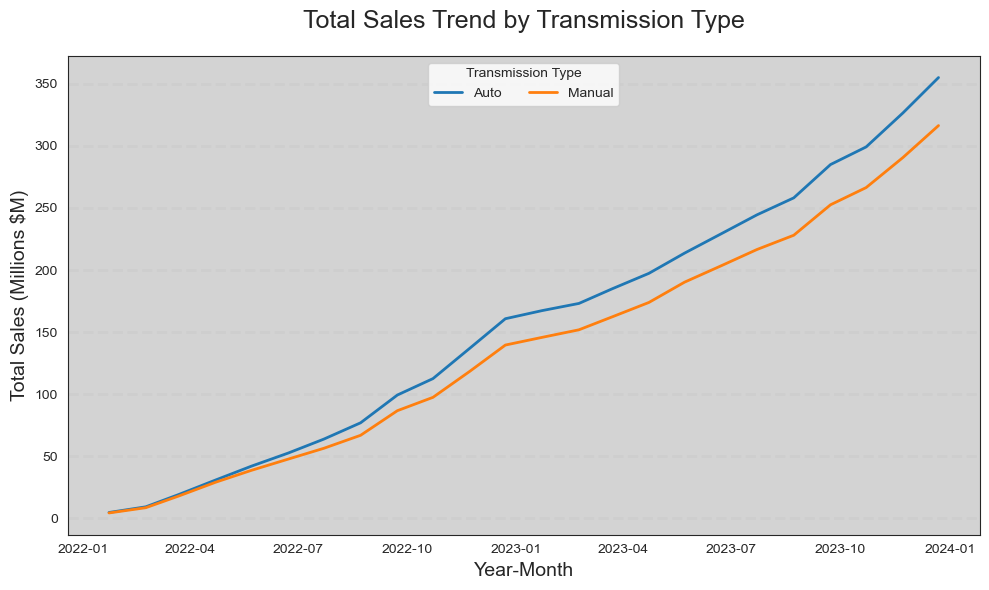

In [36]:
# --- Question: What are the sales trends for each type of Transmission telling us? Which type sells the most? ---

from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter

# Ensuring 'Price ($)' is numeric and 'Date' is datetime, then sorting
car_sales['Price ($)'] = pd.to_numeric(car_sales['Price ($)'], errors='coerce')
car_sales['Date'] = pd.to_datetime(car_sales['Date'])
car_sales = car_sales.sort_values(by='Date')

# Preparing Date Columns
car_sales['Sale_Month'] = car_sales['Date'].dt.strftime('%Y-%m')
car_sales['Sale_Date'] = pd.to_datetime(car_sales['Sale_Month'])

# Aggregating Group by Sale_Month and Transmission and sum sales
# Dropping missing values for price and transmission type
monthly_sales_transmission = car_sales.dropna(subset=['Price ($)', 'Transmission']).groupby(
    ['Sale_Month', 'Transmission']
)['Price ($)'].sum().reset_index()
monthly_sales_transmission.rename(columns={'Price ($)': 'Monthly_Sales'}, inplace=True)

# Calculating CUMULATIVE SALES within each transmission group
monthly_sales_transmission['Cumulative_Sales'] = monthly_sales_transmission.groupby('Transmission')[
    'Monthly_Sales'
].cumsum()

# Scaling Data: Converting Cumulative Sales to Millions
monthly_sales_transmission['Cumulative_Sales_Millions'] = monthly_sales_transmission['Cumulative_Sales'] / 1_000_000

# Merging the Sale_Date Timestamp back for plotting and sorting
date_map = car_sales[['Sale_Month', 'Sale_Date']].drop_duplicates()
monthly_sales_transmission = monthly_sales_transmission.merge(date_map, on='Sale_Month', how='left').sort_values(by='Sale_Date')

# Visualization: Line Plot (Cumulative Sales by Transmission) 

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=monthly_sales_transmission,
    x='Sale_Date',
    y='Cumulative_Sales_Millions', 
    hue='Transmission',           
    linewidth=2
)

# Setting custom locators and formatters for a clean datetime axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Total Sales Trend by Transmission Type', fontsize=18, pad=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales (Millions \$M)', fontsize=14)
plt.legend(title='Transmission Type', loc='upper center', fontsize=10, ncol = 2) # Changed label
plt.grid(axis = "y", linestyle='--', alpha=0.7, linewidth = 2)
plt.gcf().autofmt_xdate(rotation=0, ha='right')
plt.gca().set_facecolor('lightgrey')
plt.tight_layout()
plt.show() 

In [26]:
"""
Both Engine and Transmission Types pairs are exactly the same (Double Overhead Camshaft -> Auto,
Overhead Camshaft -> Manual). So the plots look exactly the same. Let's double check.
"""
condition_1 = (car_sales['Engine'] == "Double Overhead Camshaft") & (car_sales['Transmission'] == "Auto")
condition_2 = (car_sales['Engine'] == "Overhead Camshaft") & (car_sales['Transmission'] == "Manual")

# Combining the two conditions with OR (|)
final_condition = condition_1 | condition_2

# Counting the number of rows where the final condition is True
final_count = final_condition.sum()

# Total rows of the DataFrame
total_rows = car_sales.shape[0]

print(f"Total rows matching the complex condition: {final_count} // Total rows of the DataFrame: {total_rows}")

Total rows matching the complex condition: 23906 // Total rows of the DataFrame: 23906


In [27]:
# Eye sample
car_sales[["Transmission", "Engine"]]

,Transmission,Engine
0,Auto,Double Overhead Camshaft
1,Manual,Overhead Camshaft
2,Auto,Double Overhead Camshaft
3,Auto,Double Overhead Camshaft
4,Auto,Double Overhead Camshaft
...,...,...
23901,Manual,Overhead Camshaft
23902,Auto,Double Overhead Camshaft
23903,Manual,Overhead Camshaft
23904,Auto,Double Overhead Camshaft


# Body Style Analysis

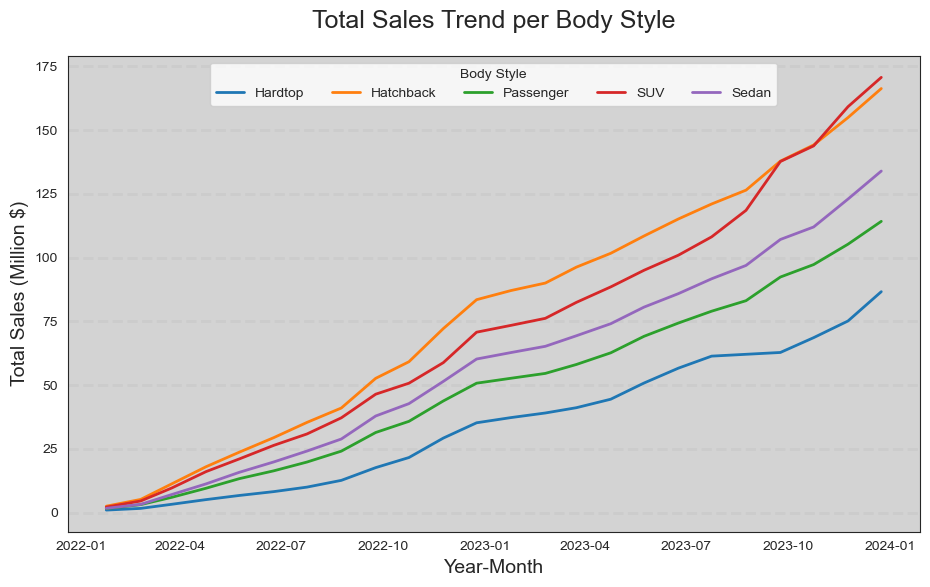

In [38]:
# --- Question: How are Body Style sales trends evolving? Should we adapt our supply to it? ---

# Converting 'Date' to datetime, sort, and ensure 'Price ($)' is numeric
car_sales['Date'] = pd.to_datetime(car_sales['Date'])
car_sales = car_sales.sort_values(by='Date')
car_sales['Price ($)'] = pd.to_numeric(car_sales['Price ($)'], errors='coerce')

# Creating 'Sale_Month' (string) and 'Sale_Date' (Timestamp) for robust grouping/plotting
car_sales['Sale_Month'] = car_sales['Date'].dt.strftime('%Y-%m')
car_sales['Sale_Date'] = pd.to_datetime(car_sales['Sale_Month'])

# Grouping data and calculating cumulative sales
monthly_sales = car_sales.dropna(subset=['Price ($)']).groupby(['Sale_Month', 'Body Style'])['Price ($)'].sum().reset_index()
monthly_sales.rename(columns={'Price ($)': 'Monthly_Sales'}, inplace=True)
monthly_sales['Cumulative_Sales'] = monthly_sales.groupby('Body Style')['Monthly_Sales'].cumsum()

# Scaling Data: Converting Cumulative Sales to Millions
monthly_sales['Cumulative_Sales_Millions'] = monthly_sales['Cumulative_Sales'] / 1_000_000

# Merging the Sale_Date Timestamp back for plotting and sort
date_map = car_sales[['Sale_Month', 'Sale_Date']].drop_duplicates()
monthly_sales = monthly_sales.merge(date_map, on='Sale_Month', how='left').sort_values(by='Sale_Date')

# Visualization: Line Chart in Millions ---
from matplotlib.dates import MonthLocator, DateFormatter

plt.figure(figsize=(11, 7))

sns.lineplot(
    data=monthly_sales,
    x='Sale_Date',
    y='Cumulative_Sales_Millions',
    hue='Body Style',
    linewidth=2
)

# Setting custom locators and formatters for a clean datetime axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3)) # Show ticks every 3 months
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Total Sales Trend per Body Style', fontsize=18, pad=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales (Million $)', fontsize=14)
plt.legend(title='Body Style', loc='upper center', ncol = 5, fontsize=10)
plt.grid(linestyle='--', axis = "y", linewidth = 2)
plt.gca().set_facecolor('lightgrey')
plt.gcf().autofmt_xdate(rotation=0, ha='right')
plt.show()

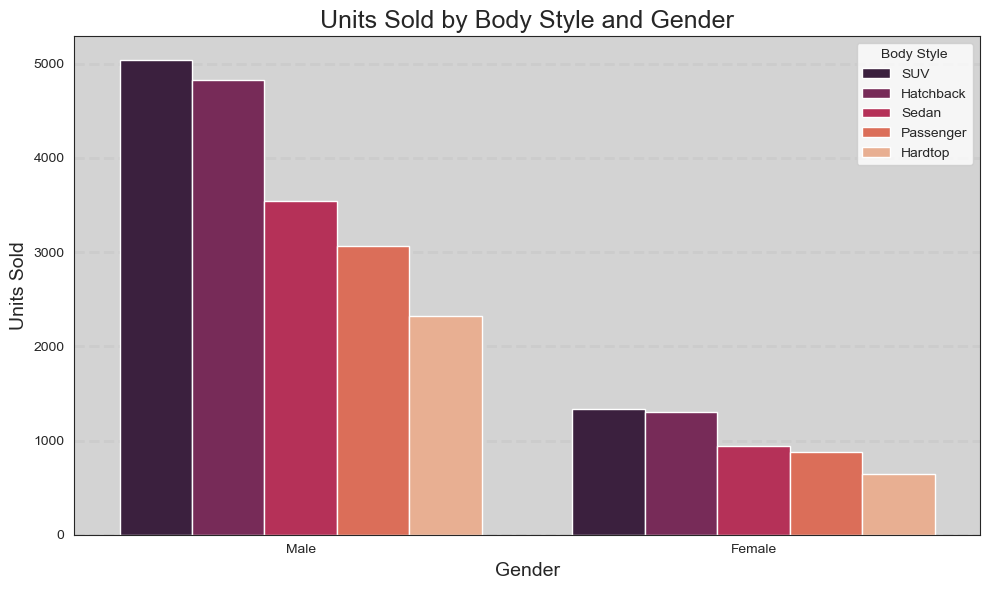

In [39]:
# --- Are there any meaningful differences between Genders, when it comes to Body Style car preferences? ---

# Calculating the total unit count for each Body Style (for ordering the bars)
body_style_order = car_sales['Body Style'].value_counts().index

# Visualization: 
plt.figure(figsize=(10, 6))

sns.countplot(
    data=car_sales,
    x='Gender',
    hue='Body Style',
    order=['Male', 'Female'],        
    hue_order=body_style_order,      
    palette='rocket',
)

plt.title('Units Sold by Body Style and Gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.legend(title='Body Style', loc='upper right')
plt.grid(linestyle='--', axis = "y", linewidth = 2)
plt.tight_layout()
plt.gca().set_facecolor('lightgrey')
plt.show()

# Gender Analysis

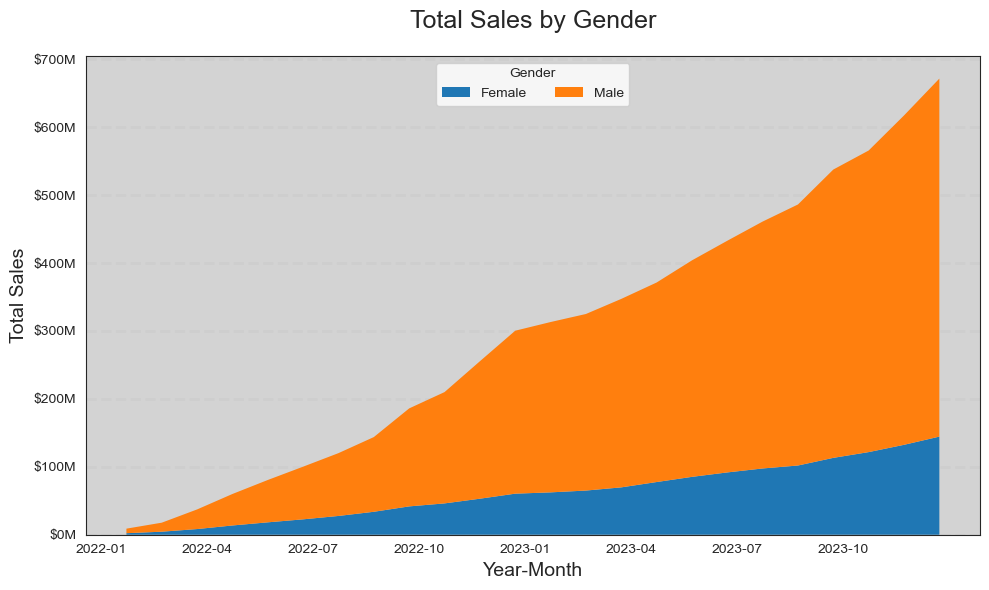

In [40]:
# --- Question: Which Gender buys more cars? Are there any changes in the trends to pay a close look? ---

# Ensuring 'Price ($)' is numeric and 'Date' is datetime, then sorting
car_sales['Price ($)'] = pd.to_numeric(car_sales['Price ($)'], errors='coerce')
car_sales['Date'] = pd.to_datetime(car_sales['Date'])
car_sales = car_sales.sort_values(by='Date')

# Preparing Date Columns (using the user's preferred 'Year-Month' name)
car_sales['Year-Month'] = car_sales['Date'].dt.strftime('%Y-%m')

# Aggregating: Group by Year-Month and Gender and sum sales
monthly_sales = car_sales.dropna(subset=['Price ($)', 'Gender']).groupby(
    ['Year-Month', 'Gender']
)['Price ($)'].sum().reset_index()
monthly_sales.rename(columns={'Price ($)': 'Monthly_Sales'}, inplace=True)

# Calculating Cumulative Sales for each Gender
monthly_sales['Cumulative_Sales'] = monthly_sales.groupby('Gender')[
    'Monthly_Sales'
].cumsum()

# Reshaping the data for stackplot
# Pivot the table so that 'Year-Month' is the index and 'Gender' are the columns
pivot_df = monthly_sales.pivot(
    index='Year-Month', columns='Gender', values='Cumulative_Sales'
).fillna(0)

# Getting the X-values (Year-Month) and Y-values (Cumulative Sales for each Gender)
x_months = pivot_df.index
y_segments = pivot_df.values.T

# Getting the labels for the legend
labels = pivot_df.columns

# Visualization: Stacked Area Chart (Cumulative Sales by Gender)
plt.figure(figsize=(10, 6))

colors = sns.color_palette('tab10', 2) 

plt.stackplot(
    x_months,
    y_segments,
    labels=labels,
    colors=colors,
    edgecolor='none'
)

# Formatting Y-axis to display in Millions
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'${x*1e-6:,.0f}M'
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Improving x-axis readability by showing fewer labels
n_months = len(x_months)
tick_indices = np.arange(0, n_months, 3)
plt.xticks(x_months[tick_indices], rotation=0, ha='right')

plt.title('Total Sales by Gender', fontsize=18, pad=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Gender', loc='upper center', fontsize=10, ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=2)
plt.gca().set_facecolor('lightgrey')
plt.tight_layout()
plt.show()

# Color Analysis

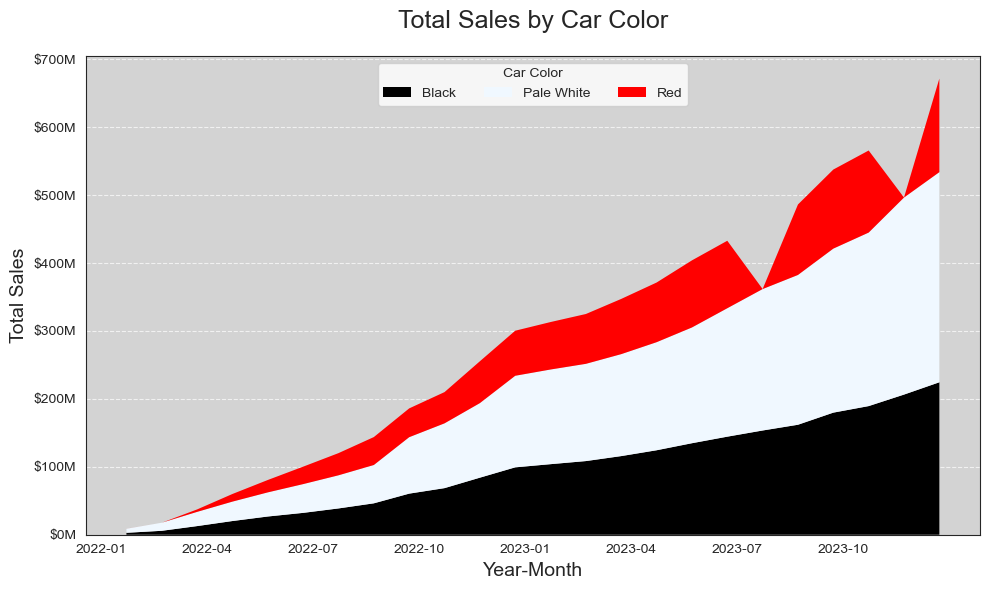

In [41]:
# --- Question: Which colors are most prefered amongst consumers? What are the trends telling us?

# Ensuring 'Price ($)' is numeric and 'Date' is datetime, then sorting
car_sales['Price ($)'] = pd.to_numeric(car_sales['Price ($)'], errors='coerce')
car_sales['Date'] = pd.to_datetime(car_sales['Date'])
car_sales = car_sales.sort_values(by='Date')

# Preparing Date Columns
car_sales['Year-Month'] = car_sales['Date'].dt.strftime('%Y-%m')

# Aggregating: Group by Year-Month and Color and sum sales
monthly_sales = car_sales.dropna(subset=['Price ($)', 'Color']).groupby(
    ['Year-Month', 'Color']
)['Price ($)'].sum().reset_index()
monthly_sales.rename(columns={'Price ($)': 'Monthly_Sales'}, inplace=True)

# Calculating Cumulative Sales for each Color
monthly_sales['Cumulative_Sales'] = monthly_sales.groupby('Color')[
    'Monthly_Sales'
].cumsum()

# Reshaping the data for stackplot
pivot_df = monthly_sales.pivot(
    index='Year-Month', columns='Color', values='Cumulative_Sales'
).fillna(0)

# Custom Color Mapping
color_map_dict = {
    'Black': '#000000',      
    'Pale White': '#F0F8FF', 
    'Red': '#FF0000'         
}

# Matching the colors to the order of columns in the pivoted DataFrame
color_labels = pivot_df.columns.tolist()
plot_colors = [color_map_dict.get(color, '#808080') for color in color_labels] 

# Get the X-values (Year-Month) and Y-values (Cumulative Sales for each Color)
x_months = pivot_df.index
y_segments = pivot_df.values.T

# Visualization: Stacked Area Chart (Cumulative Sales by Color)
plt.figure(figsize=(10, 6))

# Setting the background color for both the axes and the figure
plt.gca().set_facecolor('lightgrey')

plt.stackplot(
    x_months,
    y_segments,
    labels=color_labels,
    colors=plot_colors, 
    edgecolor='none'
)

# Formatting Y-axis to display in Millions
def millions_formatter(x, pos):
    return f'${x*1e-6:,.0f}M'
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Improving x-axis readability by showing fewer labels
n_months = len(x_months)
tick_indices = np.arange(0, n_months, 3)
plt.xticks(x_months[tick_indices], rotation=0, ha='right')

plt.title('Total Sales by Car Color', fontsize=18, pad=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Car Color', loc='upper center', ncol=3, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white') 
plt.tight_layout()
plt.show()

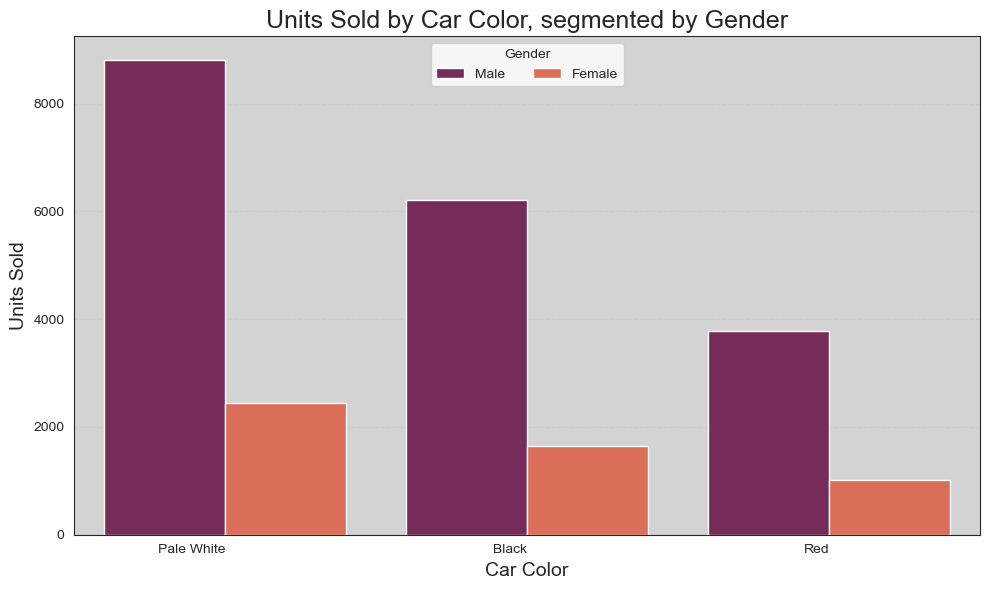

In [45]:
# --- Question: How are color preferences distributed by Gender? ---

plt.figure(figsize=(10, 6))

sns.countplot(
    data=car_sales,
    x='Color',
    hue='Gender',
    palette='rocket',
    order=car_sales['Color'].value_counts().index
)


plt.title('Units Sold by Car Color, segmented by Gender', fontsize=18)
plt.xlabel('Car Color', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.legend(title='Gender', loc = "upper center", ncol=2)
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha = 0.9)
plt.tight_layout()
plt.gca().set_facecolor('lightgrey')
plt.show()

# Price Category Analysis

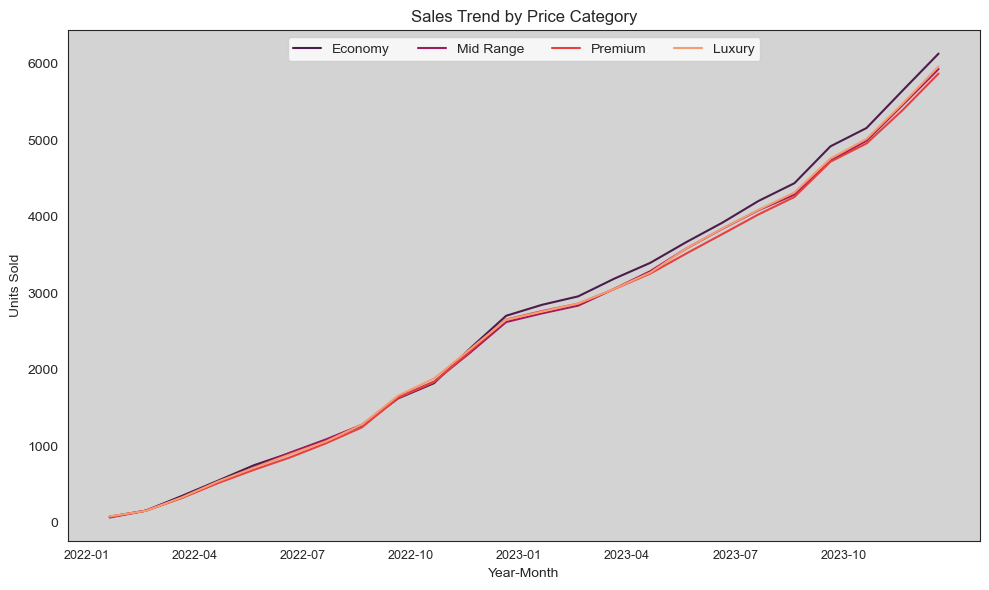

In [46]:
# --- Question: How are different price level trends evolving? Should we adapt our pricing strategy? ---

# Counting the number of rows for each unique combination of Month and Price Bin
sales_trend = car_sales.groupby(['Year_Month', 'Price_Bins'], observed=False).size().reset_index(name='Units Sold')

# Sort the data by the time column ('Year_Month') to ensure the cumulative sum is calculated chronologically.
sales_trend = sales_trend.sort_values(by=['Year_Month'])

# Creating the running total for each price category independently
sales_trend['Cumulative Units Sold'] = sales_trend.groupby('Price_Bins', observed=False)['Units Sold'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=sales_trend, 
    x='Year_Month', 
    y='Cumulative Units Sold',
    hue='Price_Bins',
    palette='rocket'
)

x_labels = sales_trend['Year_Month'].unique() 
x_positions = range(len(x_labels))

tick_spacing = 3 
selected_positions = x_positions[::tick_spacing]
selected_labels = x_labels[::tick_spacing]

plt.xticks(
    ticks=selected_positions, 
    labels=selected_labels,   
    rotation=0,              
    ha='right',               
    fontsize=9                
)
plt.gca().set_facecolor('lightgrey')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.title('Sales Trend by Price Category')
plt.legend(loc = "upper center", ncol = 4)
plt.tight_layout()
plt.show()

# Income Group Analysis

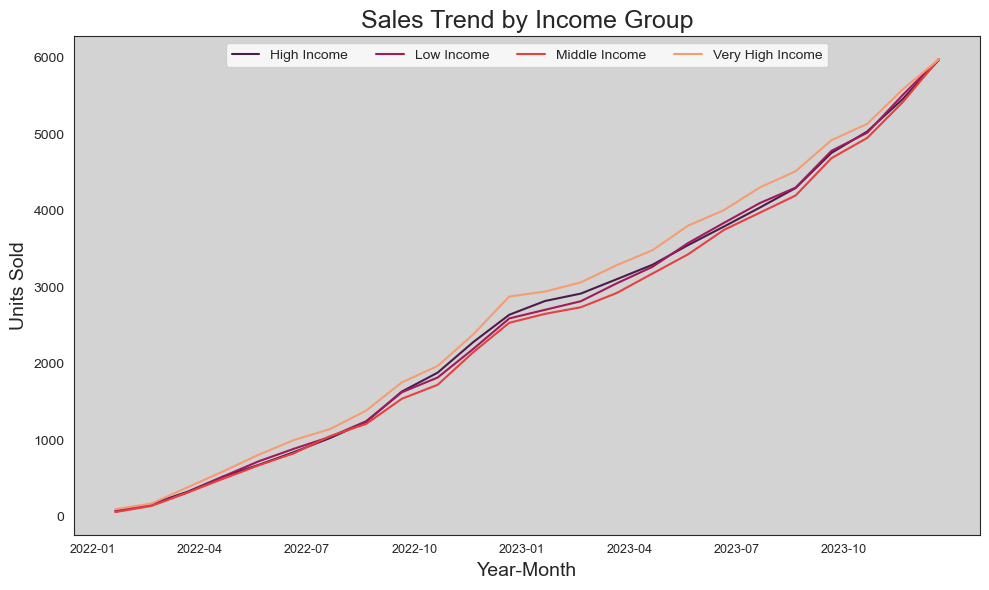

In [31]:
# --- Question: How are Income Group trends evolving? Should we adapt our strategy accordingly?

# Preparing the Data

sales_trend = car_sales.groupby(['Year_Month', 'Income Group'], observed=False).size().reset_index(name='Units Sold')
sales_trend = sales_trend.sort_values(by=['Year_Month'])
sales_trend['Cumulative Units Sold'] = sales_trend.groupby('Income Group', observed=False)['Units Sold'].cumsum()

# Plotting 

plt.figure(figsize=(10, 6))

sns.lineplot(    
    data=sales_trend, 
    x='Year_Month', 
    y='Cumulative Units Sold',
    hue='Income Group',
    palette='rocket'
)

x_labels = sales_trend['Year_Month'].unique() 
x_positions = range(len(x_labels))

tick_spacing = 3 
selected_positions = x_positions[::tick_spacing]
selected_labels = x_labels[::tick_spacing]

plt.xticks(
    ticks=selected_positions, 
    labels=selected_labels,   
    rotation=0,              
    ha='right',               
    fontsize=9                
)
plt.gca().set_facecolor('lightgrey')
plt.xlabel('Year-Month',fontsize = 14)
plt.ylabel('Units Sold', fontsize = 14)
plt.title('Sales Trend by Income Group',fontsize = 18)
plt.legend(loc = "upper center", ncol = 4)
plt.tight_layout()
plt.show()

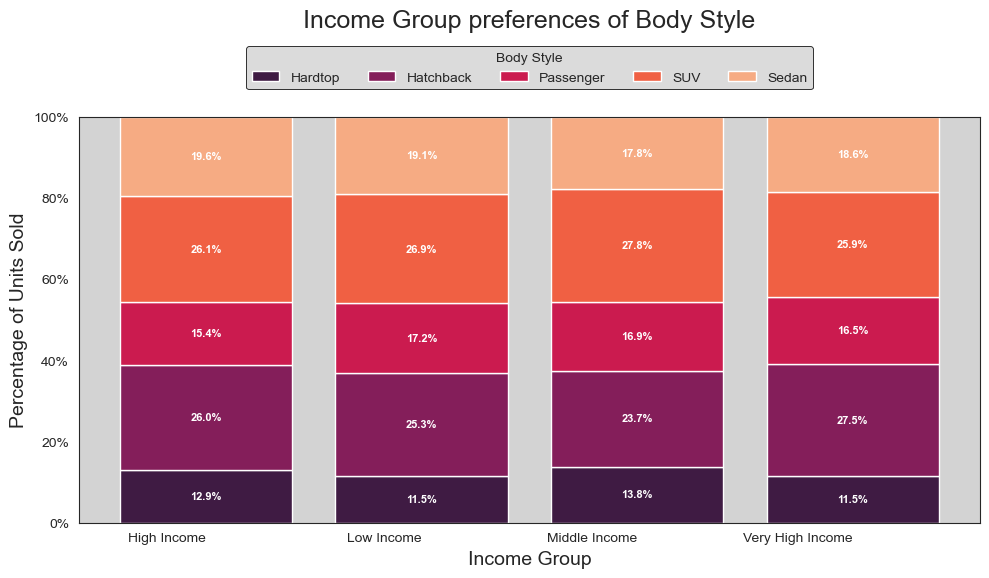

In [47]:
# --- Question: What are the Income Group preferences when it comes to car Body Style? ---

# Aggregating and Calculating Percentages
sales_by_group = car_sales.groupby(['Income Group', 'Body Style'],observed=False).size().reset_index(name='Units Sold')

# Calculating total sales per Income Group and then the percentage
sales_by_group['Total Sales'] = sales_by_group.groupby('Income Group', observed=False)['Units Sold'].transform('sum')
sales_by_group['Percentage'] = (sales_by_group['Units Sold'] / sales_by_group['Total Sales']) * 100

# Pivot for plotting
pivot_table = sales_by_group.pivot_table(
    index='Income Group',
    columns='Body Style',
    values='Percentage',
    fill_value=0,
    observed=False
)

# Plotting with Matplotlib's ax.bar() and Adding Labels
plt.figure(figsize=(10, 6))
ax = plt.gca()

bottom_pct = pd.Series([0] * len(pivot_table.index), index=pivot_table.index)
colors = sns.color_palette("rocket", n_colors=len(pivot_table.columns))

for body_style, color in zip(pivot_table.columns, colors):
    current_height = pivot_table[body_style]

    ax.bar(pivot_table.index, current_height, label=body_style, color=color, bottom=bottom_pct)

    # Adding the percentage label
    for income_group, height in current_height.items():
        if height > 5: # Only label segments larger than 5% for readability
            center_y = bottom_pct[income_group] + height / 2
            
            ax.text(
                income_group, 
                center_y, 
                f'{height:.1f}%', # Format to one decimal point
                ha='center', 
                va='center',
                color='white',
                fontsize=8,
                weight='bold'
            )

    bottom_pct += current_height
    
#  Final Plot Aesthetics
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f'{i}%' for i in np.arange(0, 101, 20)])

ax = plt.gca()

legend = ax.legend(
    title='Body Style', 
    bbox_to_anchor=(0.5, 1.05), 
    loc='lower center',
    ncol=len(body_style), 
    facecolor='lightgrey', 
    edgecolor='black',
    frameon=True
)

legend.get_frame().set_linewidth(0.7)

plt.gca().set_facecolor('lightgrey')
plt.xlabel('Income Group',fontsize = 14)
plt.ylabel('Percentage of Units Sold', fontsize = 14)
plt.title('Income Group preferences of Body Style', y = 1.2,fontsize = 18)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()